This is to demonstrate how to use my script. It's recommended to go through `install_chinese_font.ipynb` first to make sure the Traditional Chinese words display properly.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import visualization

plt.style.use(['seaborn-colorblind', 'seaborn-talk'])
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')
%matplotlib inline

# Read data
I use the 2021-05-01 to 2021-05-15 water level data as the toy data.

In [2]:
df = pd.read_csv('data/test.csv')
df

,井名,日期時間,井號,水面至井口深度,Lon,Lat,月
0,國聖(1),2021-05-01 00:00:00,7010111,3.933,120.569126,24.092658,5
1,國聖(1),2021-05-01 00:10:00,7010111,3.931,120.569126,24.092658,5
2,國聖(1),2021-05-01 00:20:00,7010111,3.932,120.569126,24.092658,5
3,國聖(1),2021-05-01 00:30:00,7010111,3.933,120.569126,24.092658,5
4,國聖(1),2021-05-01 00:40:00,7010111,3.934,120.569126,24.092658,5
...,...,...,...,...,...,...,...
263689,東石(4),2021-05-14 23:10:00,10090141,20.302,120.154469,23.460335,5
263690,東石(4),2021-05-14 23:20:00,10090141,20.293,120.154469,23.460335,5
263691,東石(4),2021-05-14 23:30:00,10090141,20.283,120.154469,23.460335,5
263692,東石(4),2021-05-14 23:40:00,10090141,20.274,120.154469,23.460335,5


# Mark the sites by water level
The function `visualization.Waterlvl().MarkbyEP()` have criterias [安全, 下限, 嚴重] to choose as input. If you input the wrong one, the script will pop up error message. My script can automatically recognize if the recent water level is in a decreasing or increasinf trend, and then choose the relevant exceedance probability (超越機率) as the determine value. If there is no historical month exceedance probabilty, the script will pick up the closet month as the database. The output has a boolean column, `wl_check`, to mark those sites passing the criteria.

The script reads `data/wl_EP_20211107.csv` as the database recording exeedance probability. 

In [3]:
select = visualization.Waterlvl()
df1 = select.MarkbyEP(df=df, criteria='安全')

In [4]:
select.MarkbyEP(df=df, criteria='亂填')

Please set the criteria in the list of dict_keys(['安全', '下限', '嚴重'])


In [5]:
df1

,井名,井號,水面至井口深度,Lon,Lat,月,wl_check
2021-05-14 23:50:00,國聖(1),7010111,3.893,120.569126,24.092658,5,True
2021-05-14 23:50:00,東榮(1),10050111,39.126,120.435512,23.557506,5,True
2021-05-14 23:50:00,安和(1),10070111,21.695,120.312655,23.514751,5,True
2021-05-14 23:50:00,和豐(1),9160212,20.494,120.231564,23.737339,5,True
2021-05-13 08:20:00,芳苑(1),7230312,14.283,120.327834,23.920473,5,True
...,...,...,...,...,...,...,...
2021-05-14 23:50:00,明德(3),9180331,24.969,120.199259,23.652903,5,True
2021-05-06 08:30:00,大溝(1),9200211,38.773,120.210658,23.566151,5,True
2021-05-14 23:50:00,文昌(4),7060141,14.036,120.419559,24.008117,5,True
2021-05-14 23:50:00,花壇(1),7080111,2.508,120.543393,24.026659,5,False


In [6]:
df1.wl_check.sum()

129

148 input sites have 129 passing the criteria of water level.

# Mark the sites by water quality
The function `visualization.Waterquality().MarkbySTD()` have `std_name` to input the desired standard (法規標準). The standards in our database are ['飲用水水源水質標準第五條', '飲用水水源水質標準第六條', '地下水污染監測標準第一類', '地下水污染監測標準第二類', '地下水污染管制標準第一類', '地下水污染管制標準第二類', '灌溉用水水質標準', '再生水用於工業用途水質基礎建議值一', '再生水用於工業用途水質基礎建議值二']. If you input the wrong one, the script will pop up error message. During recognition, the sites not having any historical measurements will be shown in the message. If a site has more than 3 measurement not passing the selected standard in any analyte, the site is marked `False` in the output boolean clumn, `wa_check`.

The output dataset can be saved into csv and used for GIS plotting.

In [7]:
select = visualization.Waterquality()
out_df = select.MarkbySTD(df=df1, std_name='飲用水水源水質標準第五條')

9060212 has no water quality measurement
9170231 has no water quality measurement


In [8]:
select.MarkbySTD(df=df1, std_name='亂填')

Please input the std_name (法規名稱) in the list: ['飲用水水源水質標準第五條', '飲用水水源水質標準第六條', '地下水污染監測標準第一類', '地下水污染監測標準第二類', '地下水污染管制標準第一類', '地下水污染管制標準第二類', '灌溉用水水質標準', '再生水用於工業用途水質基礎建議值一', '再生水用於工業用途水質基礎建議值二']


In [9]:
out_df

,井名,井號,水面至井口深度,Lon,Lat,月,wl_check,wa_check
2021-05-14 23:50:00,國聖(1),7010111,3.893,120.569126,24.092658,5,True,True
2021-05-14 23:50:00,東榮(1),10050111,39.126,120.435512,23.557506,5,True,False
2021-05-14 23:50:00,安和(1),10070111,21.695,120.312655,23.514751,5,True,False
2021-05-14 23:50:00,和豐(1),9160212,20.494,120.231564,23.737339,5,True,False
2021-05-13 08:20:00,芳苑(1),7230312,14.283,120.327834,23.920473,5,True,False
...,...,...,...,...,...,...,...,...
2021-05-14 23:50:00,明德(3),9180331,24.969,120.199259,23.652903,5,True,True
2021-05-06 08:30:00,大溝(1),9200211,38.773,120.210658,23.566151,5,True,False
2021-05-14 23:50:00,文昌(4),7060141,14.036,120.419559,24.008117,5,True,True
2021-05-14 23:50:00,花壇(1),7080111,2.508,120.543393,24.026659,5,False,False


In [10]:
out_df.wa_check.sum()

59

Only 59 sites passing the water quality check from 148 sites.

In [11]:
mask = out_df.wl_check.values & out_df.wa_check.values

print(mask.sum())
print(out_df.loc[mask, '井名'].values)
print(out_df.loc[mask, '井號'].values)

50
['國聖(1)' '全興(2)' '合興(3)' '興化(2)' '客厝(2)' '青山(2)' '虎溪(2)' '永定' '全興(1)'
 '花橋(3)' '花壇(4)' '花壇(3)' '興化(3)' '田尾(2)' '洛津(2)' '崙子(2)' '好修(2)' '好修(3)'
 '海園(4)' '安南(2)' '大溝(2)' '和豐(2)' '東和(1)' '新光(2)' '趙甲(1)' '石榴(2)' '石榴(3)'
 '田中(2)' '東和(3)' '新民(2)' '土庫(2)' '溪湖(2)' '秀潭' '文昌(3)' '虎溪(4)' '溫厝(2)'
 '柑園新(2)' '東光(4)' '東光(5)' '花橋(1)' '竹山(1)' '嘉興(3)' '虎溪(3)' '九隆(3)' '東芳(2)'
 '東光(3)' '舊庄(5)' '港後(3)' '明德(3)' '文昌(4)']
['7010111' '7050122' '7220231' '9130222' '9170421' '7100221' '9010122'
 '9110211' '7050112' '7080132' '7080141' '7080131' '9130232' '7210121'
 '7020121' '9170122' '7140121' '7140131' '9160141' '9140122' '9200221'
 '9160222' '9070112' '8060121' '7200112' '9010222' '9010231' '7120121'
 '9070131' '8060221' '9050321' '7110122' '9050211' '7060131' '9010142'
 '9020121' '7260122' '9180441' '9180451' '7080112' '8040111' '9080132'
 '9010132' '9040231' '7010221' '9180431' '9080251' '9110131' '9180331'
 '7060141']


Only these 50 sites can be selected as the proper backup groundwater resources.

# Plot the historical water quality of the selected site and standard
If you wish to output the figures, please set `savefig` to True. The figure is in png (200dpi) format.  The visualization uses the data in `database_ZAF_wa_merged_20211031.xlsx` and `stds_and_cols.xlsx`.

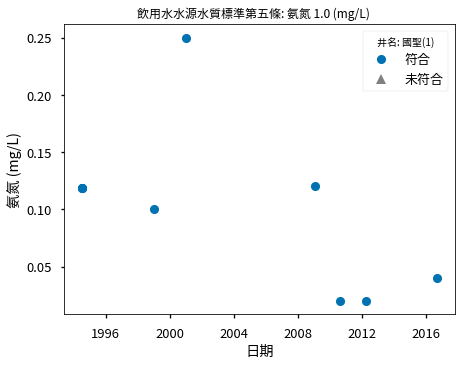

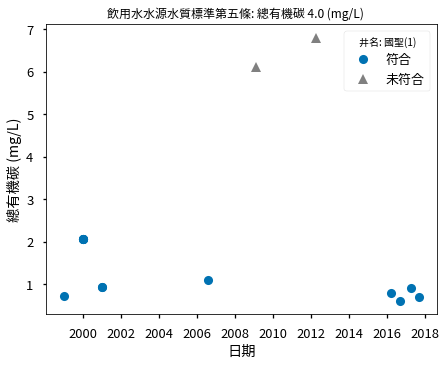

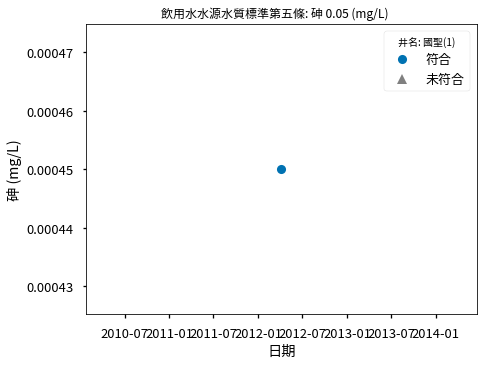

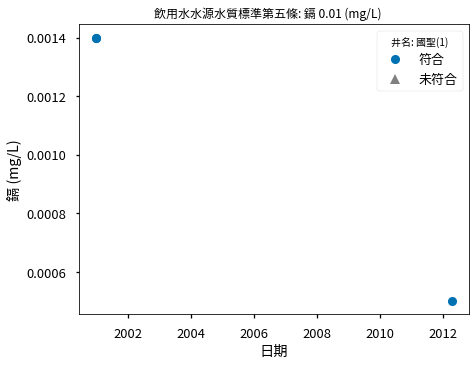

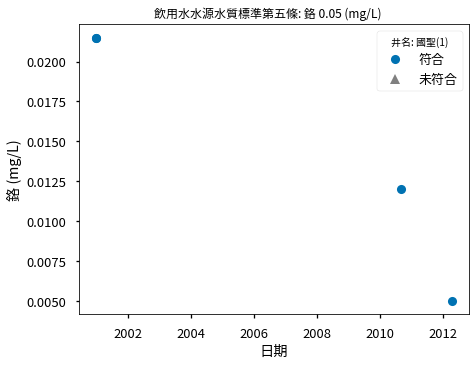

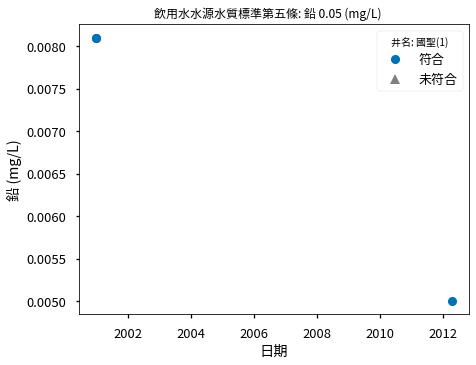

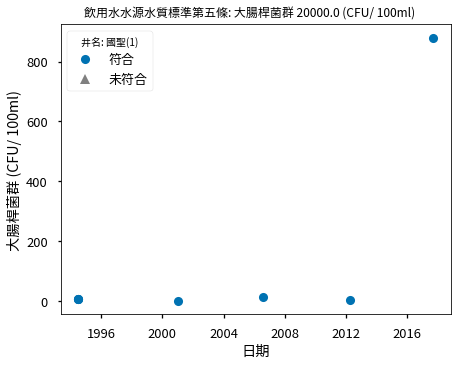

In [12]:
select = visualization.Waterquality()
select.plot(siteid='7010111', std_name='飲用水水源水質標準第五條', savefig=False)